In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from os import chdir
chdir('..')
import hydrogeosines as hgs

# Create site object
site = hgs.Site('death valley', geoloc=[-116.471360, 36.408130, 688])

# Import data into site object
site.import_csv('tests/data/death_valley/Rau_et_al_2021.csv',
                 input_category=["GW","BP","ET"], utc_offset=0, unit=["m","m","str"],
                 how="add")

# Obtain each time series as a numpy array
GW = np.array(site.data[site.data.category=='GW'].value)
BP = np.array(site.data[site.data.category=='BP'].value)
ET = np.array(site.data[site.data.category=='ET'].value)

# Manually define sampling period and frequency, for now
ps = 15./60./24. # 15 minute sampling period, converted to day units
fs = 1./ps # sampling frequency in cpd

# Manually create time elapsed vector, for now
t = np.arange(0., len(GW)*ps, ps)

# Create process object
process = hgs.Processing(site)

Datetime was 'naive'. Localized and converted to UTC!
A new time series was added ...


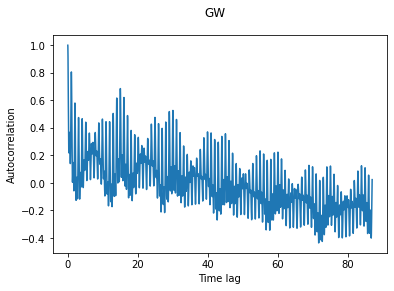

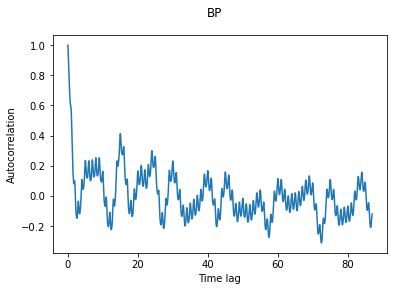

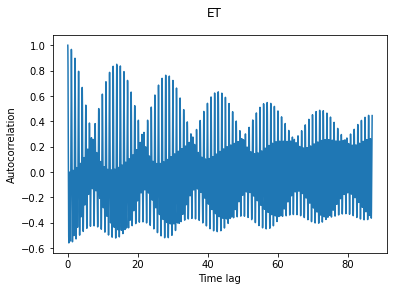

In [16]:
# Perform and plot autocorrelation analyses
GW_ac = hgs.ext.hgs_analysis.Time_domain.autocorrelation(GW)
plt.plot(t[:len(GW_ac)], GW_ac)
plt.suptitle('GW')
plt.xlabel('Time lag (days)')
plt.ylabel('Autocorrelation')
plt.show()

BP_ac = hgs.ext.hgs_analysis.Time_domain.autocorrelation(BP)
plt.plot(t[:len(BP_ac)], BP_ac)
plt.suptitle('BP')
plt.xlabel('Time lag (days)')
plt.ylabel('Autocorrelation')
plt.show()

ET_ac = hgs.ext.hgs_analysis.Time_domain.autocorrelation(ET)
plt.plot(t[:len(ET_ac)], ET_ac)
plt.suptitle('ET')
plt.xlabel('Time lag (days)')
plt.ylabel('Autocorrelation')
plt.show()

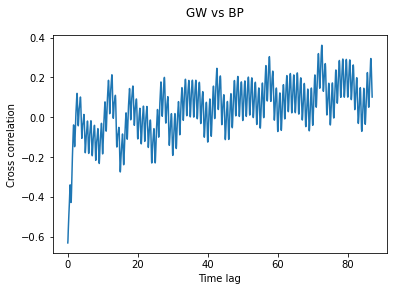

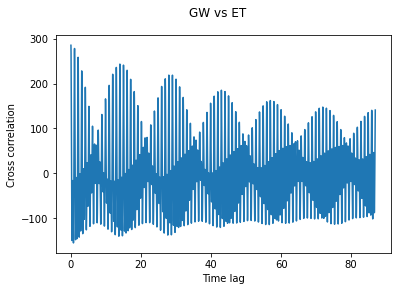

In [17]:
# Perform and plot cross correlation analyses
GW_BP_cc = hgs.ext.hgs_analysis.Time_domain.crosscorrelation(GW, BP)
plt.plot(t[:len(GW_BP_cc)], GW_BP_cc)
plt.suptitle('GW vs BP')
plt.xlabel('Time lag (days)')
plt.ylabel('Cross correlation')
plt.show()

GW_ET_cc = hgs.ext.hgs_analysis.Time_domain.crosscorrelation(GW, ET)
plt.plot(t[:len(GW_ET_cc)], GW_ET_cc)
plt.suptitle('GW vs ET')
plt.xlabel('Time lag (days)')
plt.ylabel('Cross correlation')
plt.show()

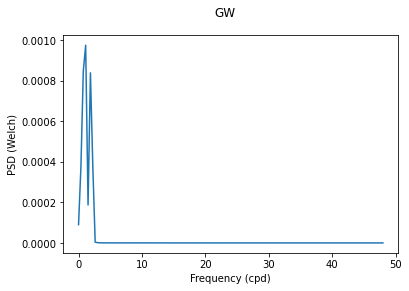

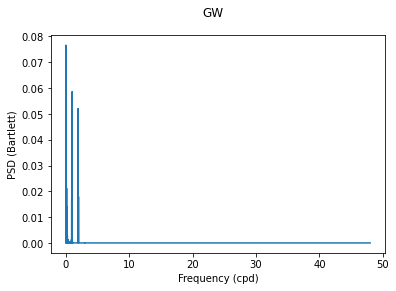

In [33]:
# Perform and plot power spectral density analyses
f, GW_psd_welch = hgs.ext.hgs_analysis.Freq_domain.power_spectral_density(GW, fs, method='welch')
plt.plot(f, GW_psd_welch)
plt.suptitle('GW')
plt.xlabel('Frequency (cpd)')
plt.ylabel('PSD (Welch)')
plt.show()

f, GW_psd_bartlett = hgs.ext.hgs_analysis.Freq_domain.power_spectral_density(GW, fs, method='bartlett')
plt.plot(f, GW_psd_bartlett)
plt.suptitle('GW')
plt.xlabel('Frequency (cpd)')
plt.ylabel('PSD (Bartlett)')
plt.show()

'''f, GW_psd_lombscargle = hgs.ext.hgs_analysis.Freq_domain.power_spectral_density(GW, method='lombscargle')
plt.plot(f, GW_psd_lombscargle)
plt.suptitle('GW')
plt.xlabel('Frequency (cpd)')
plt.ylabel('PSD (Lomb-Scargle)')
plt.show()''';

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


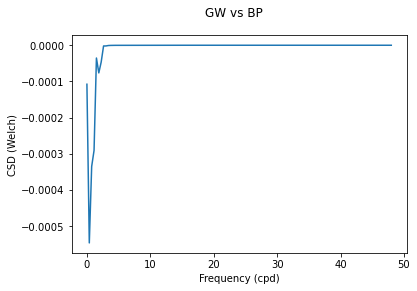

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


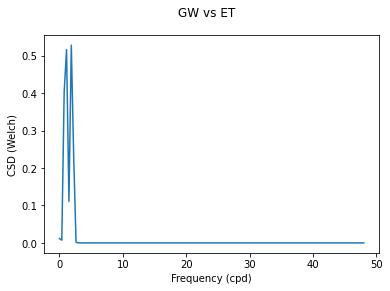

In [19]:
# Perform and plot cross spectral density analyses
f, GW_BP_csd = hgs.ext.hgs_analysis.Freq_domain.cross_spectral_density(GW, BP, fs)
plt.plot(f, GW_BP_csd)
plt.suptitle('GW vs BP')
plt.xlabel('Frequency (cpd)')
plt.ylabel('CSD (Welch)')
plt.show()

f, GW_ET_csd = hgs.ext.hgs_analysis.Freq_domain.cross_spectral_density(GW, ET, fs)
plt.plot(f, GW_ET_csd)
plt.suptitle('GW vs ET')
plt.xlabel('Frequency (cpd)')
plt.ylabel('CSD (Welch)')
plt.show()

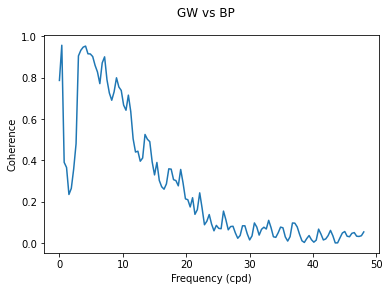

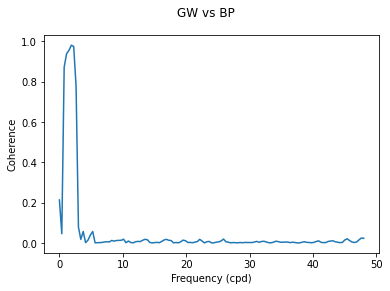

In [20]:
# Perform and plot coherence analyses
f, GW_BP_coh = hgs.ext.hgs_analysis.Freq_domain.coherence(GW, BP, fs)
plt.plot(f, GW_BP_coh)
plt.suptitle('GW vs BP')
plt.xlabel('Frequency (cpd)')
plt.ylabel('Coherence')
plt.show()

f, GW_ET_coh = hgs.ext.hgs_analysis.Freq_domain.coherence(GW, ET, fs)
plt.plot(f, GW_ET_coh)
plt.suptitle('GW vs BP')
plt.xlabel('Frequency (cpd)')
plt.ylabel('Coherence')
plt.show()

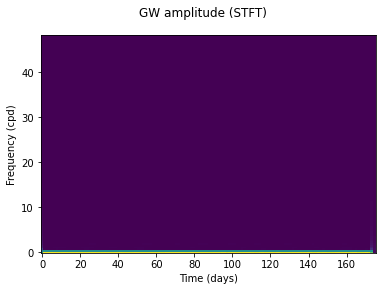

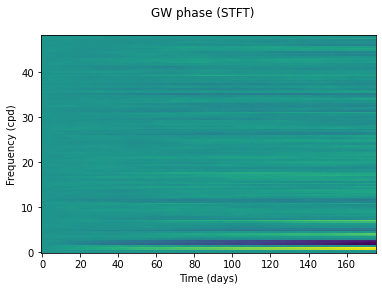

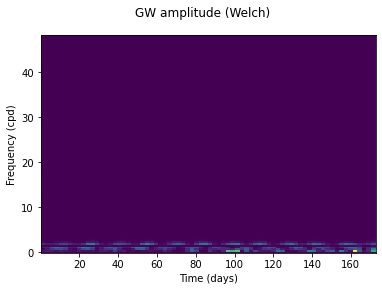

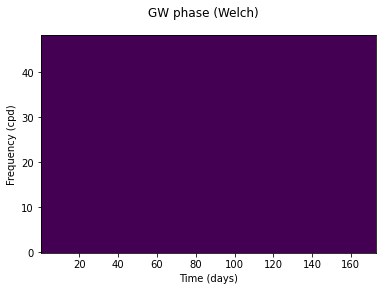

In [37]:
# Perform and plot spectrogram analyses
f, tau, GW_spec_stft = hgs.ext.hgs_analysis.Freq_domain.spectrogram(GW, fs, method='stft')
plt.pcolormesh(tau, f, np.abs(GW_spec_stft), shading='auto')
plt.suptitle('GW amplitude (STFT)')
plt.xlabel('Time (days)')
plt.ylabel('Frequency (cpd)')
plt.show()

plt.pcolormesh(tau, f, np.unwrap(np.angle(GW_spec_stft)), shading='auto')
plt.suptitle('GW phase (STFT)')
plt.xlabel('Time (days)')
plt.ylabel('Frequency (cpd)')
plt.show()

f, tau, GW_spec_stft = hgs.ext.hgs_analysis.Freq_domain.spectrogram(GW, fs, method='welch')
plt.pcolormesh(tau, f, np.abs(GW_spec_stft), shading='auto')
plt.suptitle('GW amplitude (Welch)')
plt.xlabel('Time (days)')
plt.ylabel('Frequency (cpd)')
plt.show()

plt.pcolormesh(tau, f, np.unwrap(np.angle(GW_spec_stft)), shading='auto')
plt.suptitle('GW phase (Welch)')
plt.xlabel('Time (days)')
plt.ylabel('Frequency (cpd)')
plt.show()

'''f, tau, GW_spec_stft = hgs.ext.hgs_analysis.Freq_domain.spectrogram(GW, fs, method='cwt')
plt.pcolormesh(tau, f, np.abs(GW_spec_stft))
plt.suptitle('GW amplitude (CWT)')
plt.xlabel('Time (days)')
plt.ylabel('Frequency (cpd)')
plt.show()

plt.pcolormesh(tau, f, np.unwrap(np.angle(GW_spec_stft)))
plt.suptitle('GW phase (CWT)')
plt.ylabel('Time (days)')
plt.ylabel('Frequency (cpd)')
plt.show()''';

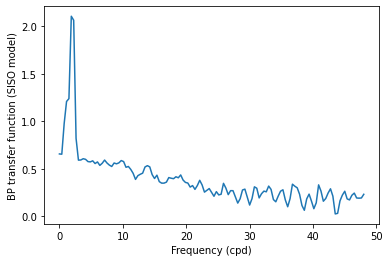

In [41]:
# Calculate BE(f) using SISO method (Quilty and Roeloffs, 1991)
f, BE_SISO = hgs.ext.hgs_analysis.Freq_domain.BE_SISO(GW, BP, fs)
plt.plot(f, BE_SISO)
plt.xlabel('Frequency (cpd)')
plt.ylabel('BP transfer function (SISO model)')
plt.show()

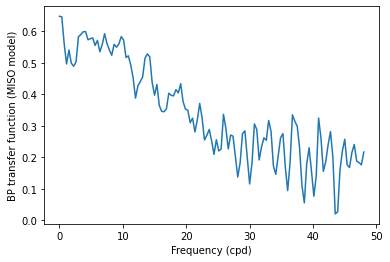

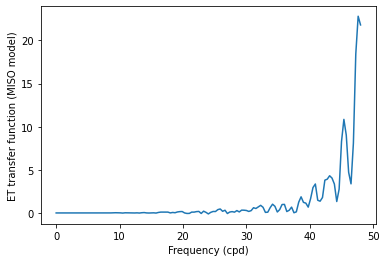

In [42]:
# Calculate BE(f) using MISO method (Rojstaczer, 1988)
f, Hb, He = hgs.ext.hgs_analysis.Freq_domain.BE_MISO(GW, BP, ET, fs)
plt.plot(f, Hb)
plt.xlabel('Frequency (cpd)')
plt.ylabel('BP transfer function (MISO model)')
plt.show()

plt.plot(f, He)
plt.xlabel('Frequency (cpd)')
plt.ylabel('ET transfer function (MISO model)')
plt.show()